**预备知识**<br>
拟采用的评价方法为AUC评估模型效果（越大越好）。AUC的取值是ROC曲线与下方坐标轴围成的面积。下面简单展示相关概念的代码实现。

In [1]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [3]:
## accuracy
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('ACC:',accuracy_score(y_true, y_pred))

ACC: 0.5


In [7]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


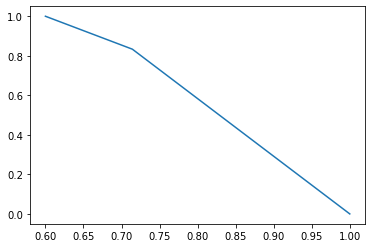

In [8]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

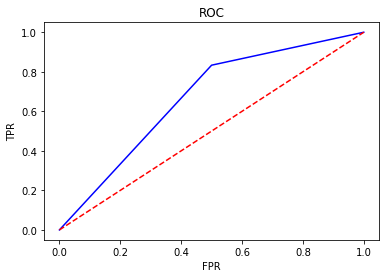

In [9]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [10]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [11]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5238095238095237


初步查看数据

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
testA = pd.read_csv('testA.csv')

print('Train data shape:', train.shape)
print('TestA data shape:', testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


In [2]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
